<h1><center>Deep Learning</center></h1>
<h2><center>Assignment # 2</center></h2>
<h3><center>Task # 2</center></h3>

In [2]:
# Include libraries which may use in implementation
import numpy as np
import random
import sklearn.datasets as ds
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline


In [44]:
# Create a Neural_Network class
class Neural_Network(object):        
    def __init__(self,inputSize = 2,hiddenlayer = 3, outputSize = 1 ):        
        # size of layers
        self.inputSize = inputSize
        self.outputSize = outputSize 
        self.hiddenLayer = hiddenlayer
        #weights
        self.W1 = np.random.rand(self.inputSize + 1, self.hiddenLayer) #? randomly initialize W1 using random function of numpy
        # size of the wieght will be (inputSize +1, hiddenlayer) that +1 is for bias    
        self.W2 = np.random.randn(self.hiddenLayer, self.outputSize) # randomly initialize W2 using random function of numpy
        # size of the wieght will be (hiddenlayer +1, outputSize) that +1 is for bias    
        
    def feedforward(self, X, activationFunction):
        #forward propagation through our network
        # dot product of X (input) and set of weights
        # apply activation function (i.e. whatever function was passed in initialization)
#         print('feed forward....starts\n')
        #print("self.W1 shape\n",self.W1.shape)
        self.l1 = np.dot(X, self.W1) #dot product of X  and first set of weights; (X size * W1 size)
        if (activationFunction == 'sigmoid'):
            self.l2 = self.sigmoid(self.l1)         #activation function
        elif (activationFunction == 'tanh'):
            self.l2 = self.tanh(self.l1)         #activation function
        elif (activationFunction == 'relu'):
            self.l2 = self.relu(self.l1)
        
        self.l3 = np.dot(self.l2, self.W2) #dot product of hidden layer (l2) and second set of weights
        output = self.sigmoid(self.l3)
        return output #     return your answer with as a final output of the network

    def sigmoid(self, s):
        # activation function
        return (1/ (1 + np.exp(-s)))  # apply sigmoid function on s and return it's value

    def sigmoid_derivative(self, s):
        #derivative of sigmoid
        #sig = self.sigmoid(s)
        sigmoidDerivative = s * (1 - s)
        return sigmoidDerivative # apply derivative of sigmoid on s and return it's value 
    
    def tanh(self, s):
        # activation function
        
        return (np.exp(s) - np.exp(-s)) / (np.exp(s) + np.exp(-s)) # apply tanh function on s and return it's value

    def tanh_derivative(self, s):
        #derivative of tanh
        
        return 1 - (s)**2 # apply derivative of tanh on s and return it's value
    
    def relu(self, s):
        # activation function
        return np.maximum(0,s) # apply relu function on s and return it's value

    def relu_derivative(self, s):
        #derivative of relu
        return np.greater(s, 0).astype(int) # apply derivative of relu on s and return it's value

    def backwardpropagate(self,X, Y, y_pred, lr, activationFunction):
        # backward propagate through the network
        # compute error in output which is loss compute cross entropy loss function
        # applying derivative of that applied activation function to the error
        # adjust set of weights
#         print('backpropogation')
        self.output_error = y_pred - Y # error in output
        self.output_delta = self.output_error * self.sigmoid_derivative(y_pred)
        
        self.l2_error = np.dot( self.output_delta, self.W2.T, ) 
        
        if (activationFunction == 'sigmoid'):
            self.l2_delta = self.l2_error * self.sigmoid_derivative(self.l2) 
        elif (activationFunction == 'tanh'):
            self.l2_delta = self.l2_error * self.tanh_derivative(self.l2) 
        elif (activationFunction == 'relu'):
            self.l2_delta = self.l2_error * self.relu_derivative(self.l2)
        
        self.W1 -= lr * ( X.T.dot(self.l2_delta)) # adjusting first set (input -> hidden) weights
        self.W2 -= lr * (self.l2.T.dot(self.output_delta)) # adjusting second set (hidden -> output) weights
#         print("w1 >>" , self.W1)
#         print("\nw2 >>" , self.W2)
        
    
    def crossentropy(self, Y, Y_pred):
        # compute error based on crossentropy loss 
        return - np.sum((Y * np.log2 (Y_pred)) + ((1-Y)* np.log2 (1- Y_pred))) #error

    def train(self,activationFunction, trainX, trainY,epochs = 100, learningRate = 0.001, plot_err = True ,validationX = 'Null', validationY = 'Null'):
        # feed forward trainX and trainY and recivce predicted value
        # backpropagation with trainX, trainY, predicted value and learning rate.
        # if validationX and validationY are not null than show validation accuracy and error of the model.
        # plot error of the model if plot_err is true
        errorTrain =[]
        errorValid =[]
        ValidationAccuracy =[]
        TraingingAccuracy = []
        for i in range(epochs): 
            prediction = self.feedforward(trainX,activationFunction)
            self.backwardpropagate(X=trainX, Y=trainY, y_pred= prediction,lr= learningRate, activationFunction= activationFunction )
            errorTrain.append(self.crossentropy(Y=trainY,Y_pred = prediction ))
            errorValid.append(self.crossentropy(validationY, self.predict(validationX, activationFunction)))
            ValidationAccuracy.append(self.accuracy(validationX,validationY, activationFunction))
            TraingingAccuracy.append(self.accuracy(trainX,trainY, activationFunction))
        
        if(plot_err): #Training Loss
            plt.plot(range(epochs), errorTrain, label = 'Training loss curve')
            plt.legend()
            plt.title('loss curves using activation function ' + activationFunction)
        if(validationX != 'Null' and validationY != 'Null'):
            plt.plot(range(epochs), errorValid, label = 'Validation loss curve')
            plt.legend()
            plt.xlabel('Epochs') 
            plt.ylabel('Entropy Loss') 
            plt.show()
            
            plt.plot(range(epochs), TraingingAccuracy, label = 'Trainging accuracy')
            plt.plot(range(epochs), ValidationAccuracy, label = 'Validation accuracy')
            plt.legend()
            plt.title('Accuracy curves using activation function ' + activationFunction)
            plt.xlabel('Epochs') 
            plt.ylabel('Accuracy') 
            plt.show()
        
    
    def predict(self, testX, activationFunction):
        # predict the value of testX
        return self.feedforward(testX, activationFunction)
    
    def accuracy(self, testX, testY, activationFunction):
        # predict the value of trainX
        # compare it with testY
        # compute accuracy, print it and show in the form of picture
        testX_pred = self.predict(testX, activationFunction)
        TP = TN =0
        threshold = 0.5
        for i in range(len(testY)):
            if (testX_pred[i] >= threshold):
                testX_pred[i] =1
            else:
                testX_pred[i] =0
            if testX_pred[i] == testY[i]:
                TP+=1
        _accuracy = (TP * 100) / len(testY)

        return (_accuracy)   
        
    def saveModel(self,name, name2):
        # save your trained model, it is your interpretation how, which and what data you store
        # which you will use later for prediction
        print('saving model')
        saved_model = np.save(name,self.W1)
        saved_model2 = np.save(name2,self.W2)
        print('model saved..')
        
    def loadModel(self,name,name2):
        # load your trained model, load exactly how you stored it.
        self.W1= np.load(name )
        self.W2 = np.load(name2)
        print(self.W1)
        print(self.W2)

    


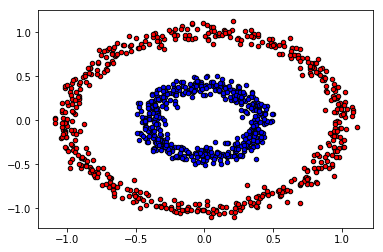

In [15]:
data, label = ds.make_circles(n_samples=1000, factor=.4, noise=0.05)

#Lets visualize the dataset
reds = label == 0
blues = label == 1
plt.scatter(data[reds, 0], data[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(data[blues, 0], data[blues, 1], c="blue", s=20, edgecolor='k')
plt.show()


In [16]:
def ShuffletrainTestSplit(data, label, trainPercentage, testPercantage):
    X, y = shuffle(data, label)

#     print("X: ", len(X), "y: ", len(y))

    trainX = X[:int(trainPercentage * len(X))] # training data point
    trainY = y[:int(trainPercentage * len(y))] # training lables
    trainY = np.expand_dims(trainY, axis = 1)
    trainX = np.hstack((trainX, np.atleast_2d(np.ones(len(trainX))).T))


    validX = X[int(trainPercentage * len(X)) :  int(trainPercentage * len(X)) + int(testPercantage * len(X)) ] # validation data point
    validY = y[int(trainPercentage * len(y))  :  int(trainPercentage * len(y)) + int(testPercantage * len(y)) ]# validation lables
    validY = np.expand_dims(validY, axis = 1)
    validX = np.hstack((validX, np.atleast_2d(np.ones(len(validX))).T))
    
    testX = X[int(trainPercentage * len(X)) +  int(testPercantage * len(X))  :]# testing data point
    testY = y[int(trainPercentage * len(y)) +  int(testPercantage * len(X))  :]# testing lables
    testY = np.expand_dims(testY, axis = 1)
    testX = np.hstack((testX, np.atleast_2d(np.ones(len(testX))).T))
    print("tr: ", len(trainX) ,"v: ",  len(validX), "ts: ",  len(testX))
    print('Done')
    return trainX, trainY, testX, testY,validX,validY



In [17]:
trainX, trainY, testX, testY,validX,validY= ShuffletrainTestSplit(data, label, 0.70, 0.15)

tr:  700 v:  150 ts:  150
Done


D:\Installed\Anaconda\lib\site-packages\ipykernel_launcher.py:109: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


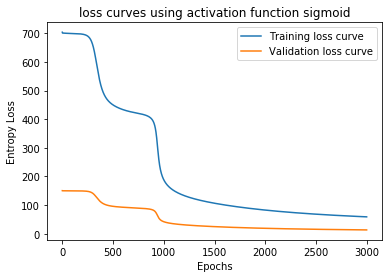

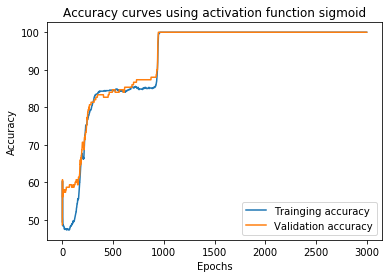

In [55]:
model = Neural_Network(2,3,1)
# try different combinations of epochs and learning rate
activationFunction = 'sigmoid' #tanh 
# activationFunction = 'tanh'
# activationFunction = 'relu'
model.train(activationFunction, trainX, trainY, epochs = 3000, learningRate = 0.01, validationX = validX, validationY = validY)

In [56]:
model.accuracy(testX,testY,activationFunction)

100.0

In [26]:
#save the best model which you have trained, 
model.saveModel('task2_01.npy', 'task2_02.npy')

saving model
model saved..


#### Note: This below section will be used for the evaluation of this task, we need your model and we will run script below to evaluated your model

In [28]:
# create class object
mm = Neural_Network()
# load model which will be provided by you
mm.loadModel('task2_01.npy', 'task2_02.npy')
# check accuracy of that model
mm.accuracy(testX,testY,activationFunction)




[[ 5.04788599 -2.19030072  4.05523285]
 [ 8.21694068  3.13141704 -0.99117939]
 [ 4.64565254 -1.57404606 -1.74574627]]
[[  9.97113617]
 [-14.20292627]
 [-13.70594547]]


100.0